# In this example, linear regression analysis will be analyzed by coding with sample application rather than mathematical analysis.

<b>Now, let's see a linear regression example using the Boston house prices dataset, which is widely used in machine learning resources. This dataset includes housing price data collected from different regions in the city of Boston. The dependent variable is the median house price in 1000 USD.</b>

- Let's see the dependent variables

In [1]:
import pandas as pd

boston_df = pd.read_csv('Boston.csv')
boston_df.columns[:len(boston_df.columns)-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

- Let's see the non-dependent variable

In [2]:
boston_df.columns[len(boston_df.columns)-1:len(boston_df.columns)]

Index(['medv'], dtype='object')

<b> First, let's examine the relationship between housing prices (MEDV) and the LSTAT variable.
The LSTAT variable represents the percentage of families belonging to the low-income group living in the relevant neighborhood.
Logically, as the proportion of low-income families living in the surrounding area increases, house prices are expected to decrease. Let's see if it really is.
The result looks as follows.</b>

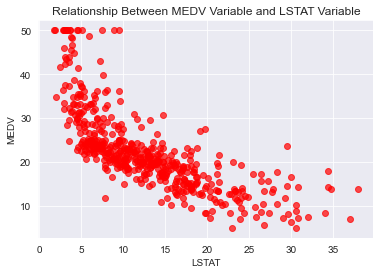

In [3]:
import matplotlib.pyplot as plt

plt.scatter(boston_df['lstat'],boston_df['medv'],alpha=0.7,c='r')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Relationship Between MEDV Variable and LSTAT Variable')
plt.show()

<b>As we mentioned above, we see that the MEDV value decreases as LSTAT increases.</b>

<b>Let's define the non-dependent variables as X and the dependent variable as Y. Since we will only use the LSTAT variable, let's take this variable alone.</b>

In [4]:
x = boston_df.drop('medv', axis = 1).values

lstat = boston_df[['lstat']].values

medv = boston_df['medv'].values

<b>To apply linear regression in Python, we will use the LinearRegression(), fit() and predict() functions in the linear_model module in sklearn. The first two of them are used to create a linear model using the desired variables, and the last one is used to make predictions using this model.</b>

In [5]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(lstat,medv)

LinearRegression()

<b>Now, let's draw the regression line using the model we created. The model.predict(lstat) expression we use to draw the line gives the MEDV values estimated according to the model we created.</b>

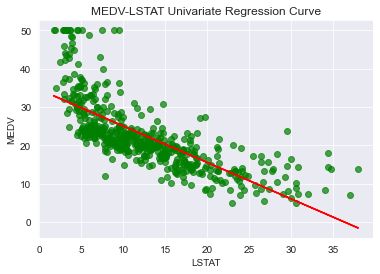

In [6]:
plt.scatter(lstat,medv,color='green',alpha=0.7)
plt.plot(lstat,model.predict(lstat),color='r')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('MEDV-LSTAT Univariate Regression Curve')
plt.show()

<b>The above model calculated the following relationship between LSTAT and MEDV.</b>
- $medv=\hat{\beta _{0}}+\hat{\beta _{1}}\cdot lstat$

<b>How can we see the $\hat{\beta _{0}}$ and $\hat{\beta _{1}}$ values in the model we found? The equation of the line above, $\hat{\beta _{0}}$, shows the point where the line intersects the y-axis and $\hat{\beta _{1}}$ shows the slope. Therefore, we can see this value using the coef_ and intercept_ methods.</b>



- $ \hat{\beta _{0}}$

In [7]:
model.intercept_

34.55384087938311

-  $\hat{\beta _{1}}$

In [8]:
model.coef_

array([-0.95004935])

<b>So far, we have made an example of linear regression with one non-dependent variable. But a linear regression can also have more than one non-dependent variable, and this is often the case. Let's use the Boston data set again. This time the independent variables are LSTAT and AGE. The AGE variable is from 1940 shows the ratio of the houses built before. In this case, we would like to find a model as follows.</b>

- $medv=\hat{\beta _{0}}+\hat{\beta _{1}}\cdot lstat+\hat{\beta _{2}}\cdot age$

In [9]:
x = boston_df[['lstat','age']].values
y=boston_df['medv'].values

model2=linear_model.LinearRegression()
model2.fit(x,y)
print(model2.intercept_) # B_0
model2.coef_             # B_1

33.2227605317929


array([-1.03206856,  0.03454434])

<b>The calculated model is as follows.</b>

- medv = 33.22 - 1.03 * lstat + 0.03 * age

<b>Finally, let's build a model using all the non-dependent variables in the model.</b>

In [10]:
x = boston_df.drop('medv',axis=1)
y = boston_df['medv']

model = linear_model.LinearRegression()
model.fit(x,y)
print(model.intercept_)
model.coef_

36.45948838509015


array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

<b>An easy way to draw linear regression graphs is the lmplot() function in the seaborn module. With this function, we can draw the regression line drawn by the least squares method as well as the data. Thanks to this, we can visually see the relationship between the variables.
As an example, let's use the car_crashes dataset in the seaborn module and select the columns alcohol as the non-dependent and total as the dependent variable. We will see from the graph that there is a strong relationship between alcohol use and car accident.</b>

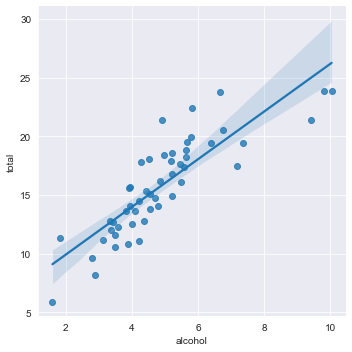

In [11]:
import seaborn as sns

car_crashes = sns.load_dataset('car_crashes')
sns.lmplot(x = 'alcohol',y ='total',data = car_crashes)
plt.show()

<b>If there are categorical variables in the dataset, we can plot the relationship between the two variables on the same graph, but separately for each graph. Now let's plot the relationship between the sepal_length and sepal_width variables in the iris dataset separately for different types.
We use the 'hue' argument for category information. When we examine the result, we will see that while there is a similar relationship in vesicolor and virginica species, the relationship in setosa species is different.</b>

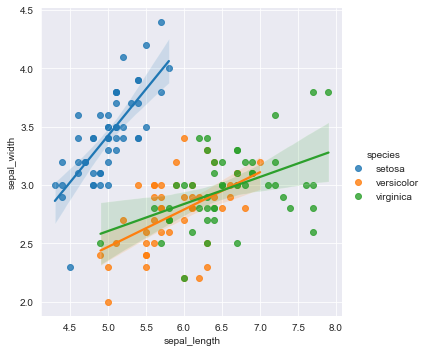

In [12]:
iris = sns.load_dataset('iris')
sns.lmplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
plt.show()

<b>Let's use the 'row' argument to plot the graphs individually.
'row' argument is used for drawing under and 'col' argument is used for drawing side by side.</b>

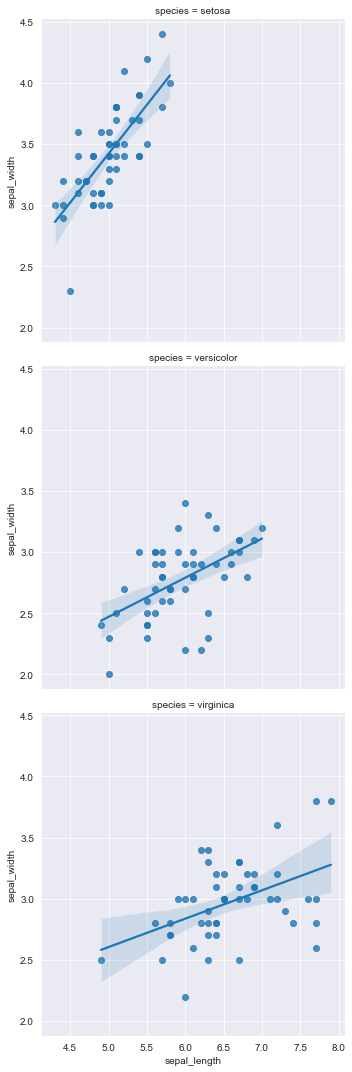

In [13]:
sns.lmplot(x='sepal_length',y='sepal_width',row='species',data=iris)
plt.show()

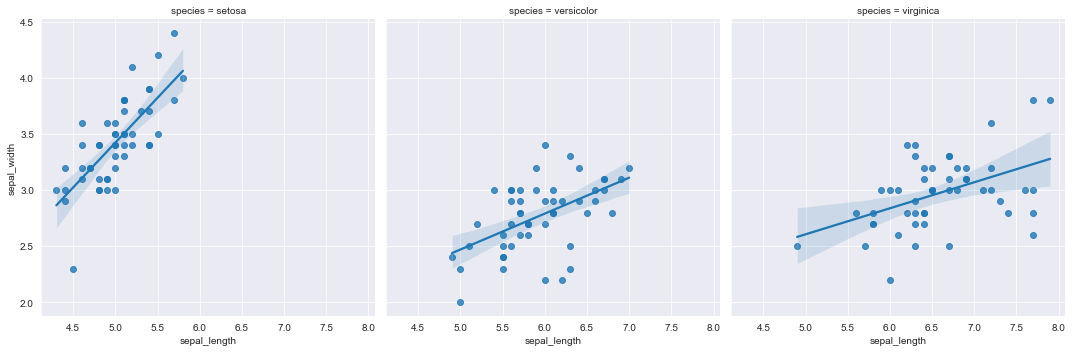

In [14]:
sns.lmplot(x='sepal_length',y='sepal_width',col='species',data=iris)
plt.show()

<b>Another useful graph in Seaborn is the residual graph. In linear regression models, the expected value of the remainder is zero and it is expected to show a normal distribution. By examining the remaining graphs, we can see whether the residual values in the model we established behave as expected. To plot the remainder graph, the residplot() in the seaborn module we use method.</b>

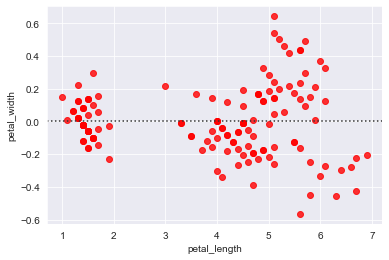

In [15]:
sns.residplot(x='petal_length',y='petal_width',data=iris,color='red')
plt.show()